In [1]:
regplot.confbands.fun <- function(x,y,confidencelevel=.95,CImean=T,PI=T,CIregline=F,legend=F){
      #### Modified from a function written by Sandra McBride, Duke University
	#### For a simple linear regression line, this function
	#### will plot the line, CI for mean response, prediction intervals, 
	#### and (optionally) a simulataneous CI for the regression line.
	xx <- x[order(x)]
	yy <- y[order(x)]
	lm1 <- lm(yy~xx)	
	plot(xx,yy,ylim=c(min(yy),(max(yy)+.2*max(yy))), xlab=deparse(substitute(x)), ylab=deparse(substitute(y)))
	abline(lm1$coefficients)
	#### calculation of components of intervals ####
	n <- length(yy)
	sx2 <- (var(xx))
	shat <- summary(lm1)$sigma
	s2hat <- shat^2
	SEmuhat <- shat*sqrt(1/n+ ((xx-mean(xx))^2)/((n-1)*sx2))
	SEpred <- sqrt(s2hat+SEmuhat^2)
	t.quantile <- qt(confidencelevel,lm1$df.residual)
	####
	if (CImean==T){
		mean.up <- lm1$fitted+t.quantile*SEmuhat
		mean.down <- lm1$fitted-t.quantile*SEmuhat
		lines(xx,mean.up,lty=2)
		lines(xx,mean.down,lty=2)
	}
	if (PI==T){
		PI.up <- lm1$fitted+t.quantile*SEpred
		PI.down <- lm1$fitted-t.quantile*SEpred
		lines(xx,PI.up,lty=3)
		lines(xx,PI.down,lty=3)
	}
	if (CIregline==T){
		HW <- sqrt(2*qf(confidencelevel,n-lm1$df.residual,lm1$df.residual))*SEmuhat	
		CIreg.up <- lm1$fitted+HW
		CIreg.down <- lm1$fitted-HW
		lines(xx,CIreg.up,lty=4)
		lines(xx,CIreg.down,lty=4)
	}	
      if (legend==T){
       	choices <- c(CImean,PI,CIregline)
       	line.type <- c(2,3,4)
             names.line <- c("Pointwise CI for mean resp.","Prediction Int.","Simultaneous conf. region for entire reg. line")
       	legend(max(xx)-.2*max(xx),max(yy)+.2*max(yy),legend=names.line[choices],lty=line.type[choices])
	}
}

In [1]:
seconds <- c(2083, 2270, 2385, 1898, 0, 0, 0, 1996, 2107, 2252, 2311, 2279, 2209, 1925, 2057, 2182, 2453, 2618, 2841, 2241, 1655, 1822, 2221, 1678, 2199, 1948, 2128, 2432, 2434, 2018, 2569, 2467, 2328, 2311, 2221, 2463, 2641, 2219, 2392, 2454, 1774, 2581, 2046, 2702, 2528, 1849, 2400, 2418, 2229, 2367, 2232, 2382, 2308, 1898, 2232, 2133, 2381, 2202, 0, 2135, 2145, 2632, 2334, 2208, 1932, 2035, 2100, 2244, 2502, 1908, 2008, 2737, 2200, 1733, 2275, 1940, 2267, 1768, 1821, 1752, 1740, 2218)
diff <- c(-19, 9, -3, -11, -20, -19, 8, 8, 4, -18, -7, 12, 10, 21, 20, 2, -5, -9, -4, -20, 31, 16, -12, -27, -3, 7, 15, 8, 5, 18, -2, 7, 4, 14, 4, 12, 1, -9, 12, -7, 28, -7, 18, -3, 4, -28, 4, 2, 5, -5, -14, 27, 8, 26, -5, 16, -10, -5, 6, 8, 5, 3, 11, 12, 16, 1, 12, -2, 6, 15, 16, -1, 6, 23, -14, 27, 11, 25, 32, 24, 36, -1)

In [2]:
d_seconds <- seconds[c(-5, -6, -7, -59)]
d_diff <- diff[c(-5, -6, -7, -59)]

In [3]:
df <- data.frame(seconds=seconds, diff=diff)

In [4]:
head(df)

,seconds,diff
,<dbl>,<dbl>
1,2083,-19
2,2270,9
3,2385,-3
4,1898,-11
5,0,-20
6,0,-19


In [13]:
paperlm = lm(d_diff ~ d_seconds, data=df)

In [14]:
summary(paperlm)


Call:
lm(formula = d_diff ~ d_seconds, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.137  -6.021   3.196   8.062  25.291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.52463   11.99254   4.213 6.86e-05 ***
d_seconds   -0.02049    0.00540  -3.795 0.000294 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.63 on 76 degrees of freedom
Multiple R-squared:  0.1593,	Adjusted R-squared:  0.1483 
F-statistic:  14.4 on 1 and 76 DF,  p-value: 0.0002944


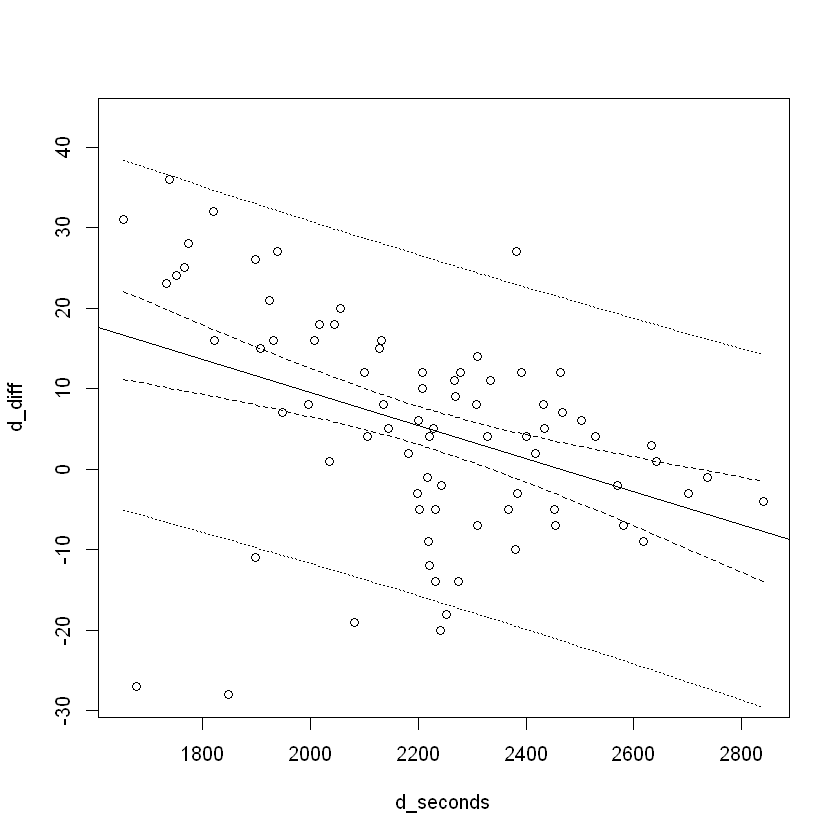

In [8]:
regplot.confbands.fun(d_seconds,d_diff)

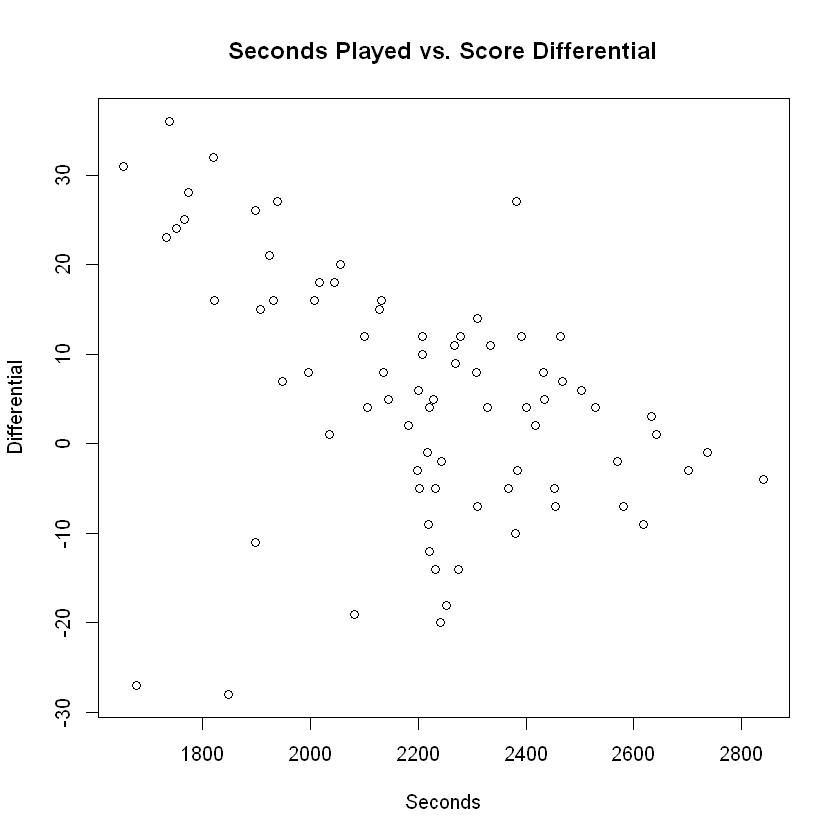

In [8]:
plot(d_seconds, d_diff, xlab="Seconds", ylab="Differential", main="Seconds Played vs. Score Differential")

In [136]:
cor(d_diff , d_seconds)

[1] -0.3991713

In [137]:
vcov(paperlm)

,(Intercept),d_seconds
(Intercept),143.82099991,-0.0642920772
d_seconds,-0.06429208,0.0000291552


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
d_seconds,1,2299.138,2299.1376,14.40492,0.0002943951
Residuals,76,12130.196,159.6078,NA,NA


In [1]:
scatter.smooth(x=d_seconds, y=d_diff, main="Differential ~ Seconds")

ERROR: Error in xy.coords(x, y, xlabel, ylabel): object 'd_diff' not found


In [141]:
paperlm = lm(diff ~ seconds, data=df)

In [142]:
anova(paperlm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
seconds,1,9.384947,9.384947,0.04801954,0.8271041
Residuals,80,15635.212614,195.440158,NA,NA


In [113]:
paperstdres = rstandard(paperlm)

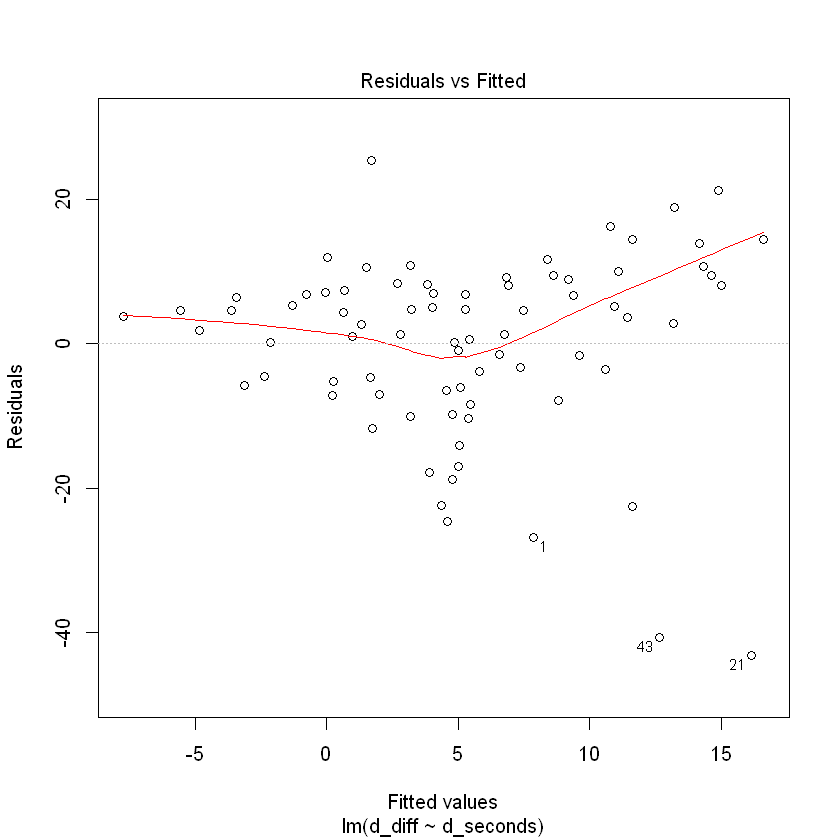

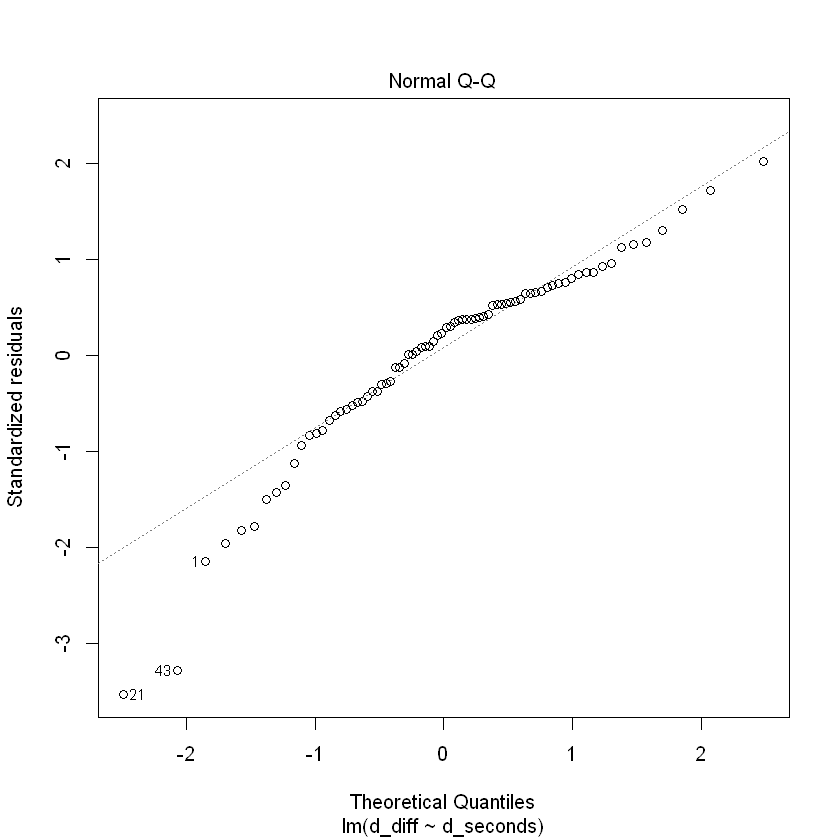

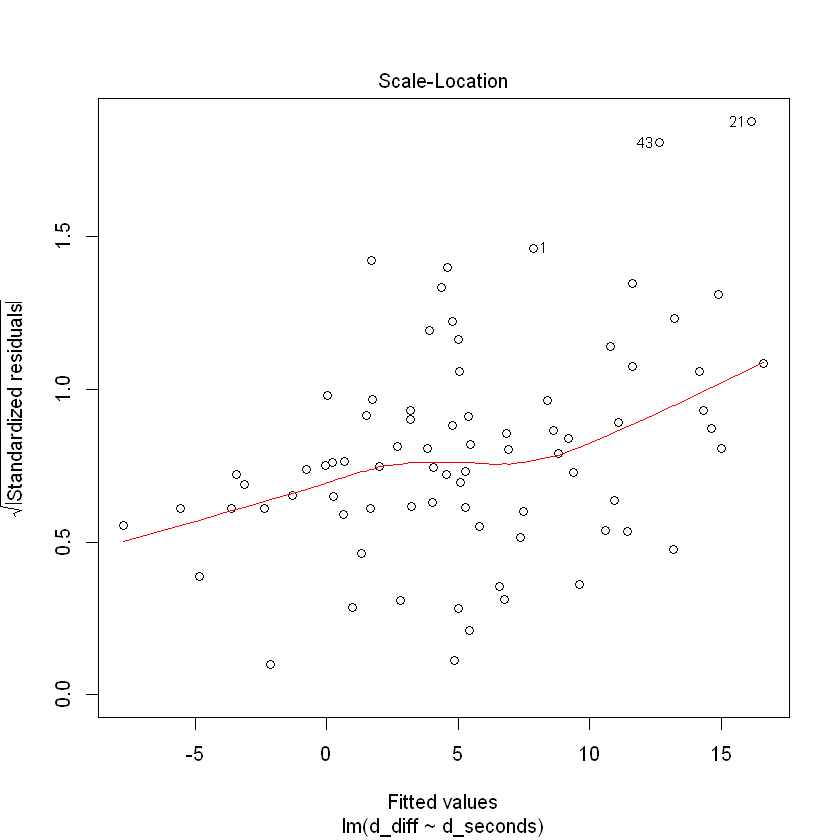

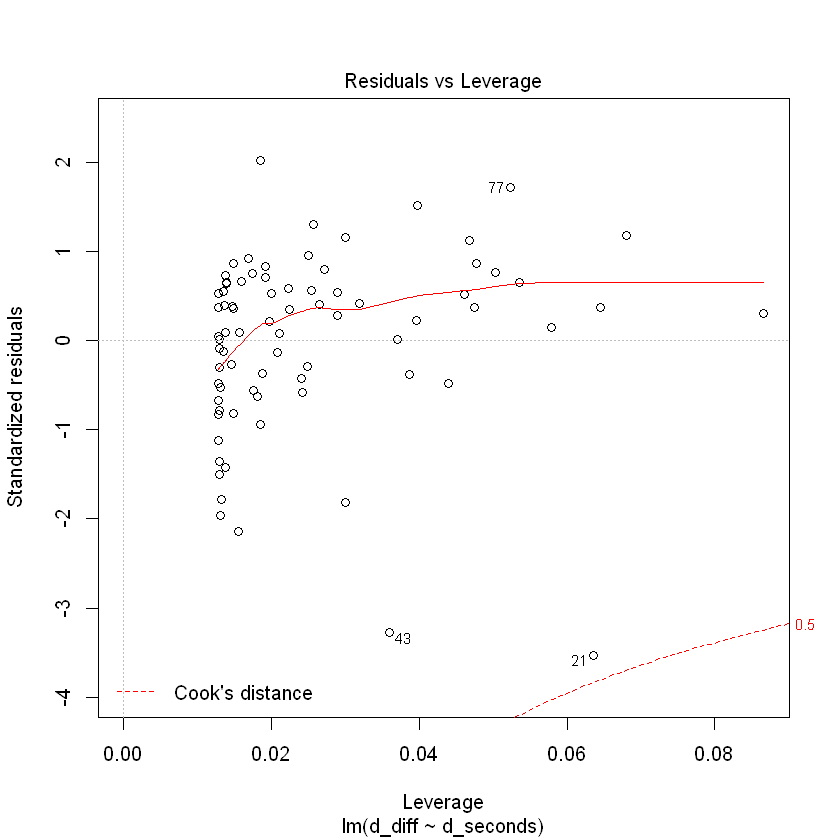

In [114]:
plot(paperlm)

In [119]:
summary(paperlm)


Call:
lm(formula = d_diff ~ d_seconds, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.137  -6.021   3.196   8.062  25.291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.52463   11.99254   4.213 6.86e-05 ***
d_seconds   -0.02049    0.00540  -3.795 0.000294 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.63 on 76 degrees of freedom
Multiple R-squared:  0.1593,	Adjusted R-squared:  0.1483 
F-statistic:  14.4 on 1 and 76 DF,  p-value: 0.0002944


In [130]:
summary(paperlm)


Call:
lm(formula = diff ~ seconds, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.924  -9.235   0.288   8.889  31.008 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  6.0806255  6.1845249   0.983    0.328
seconds     -0.0006256  0.0028550  -0.219    0.827

Residual standard error: 13.98 on 80 degrees of freedom
Multiple R-squared:  0.0005999,	Adjusted R-squared:  -0.01189 
F-statistic: 0.04802 on 1 and 80 DF,  p-value: 0.8271


In [133]:
anova(paperlm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
d_seconds,1,2299.138,2299.1376,14.40492,0.0002943951
Residuals,76,12130.196,159.6078,NA,NA


In [127]:
new <- data.frame(new_datapoint = c(1076))

Warning message:
"'newdata' had 1 row but variables found have 78 rows"


,fit,lwr,upr
1,7.83694007,4.69957407,10.9743061
2,4.00467983,1.07157137,6.9377883
3,1.64794224,-1.79548308,5.0913676
4,11.62821358,7.26600167,15.9904255
5,9.61986329,5.98987146,13.2498551
6,7.34509918,4.30676093,10.3834374
7,4.37356049,1.48035027,7.2667707
8,3.16445164,0.09649164,6.2324116
9,3.82023949,0.86262922,6.7778498
10,5.25477541,2.40544235,8.1041085


Warning message:
"'newdata' had 1 row but variables found have 78 rows"


,fit,lwr,upr
1,7.83694007,-17.519894,33.19377
2,4.00467983,-21.327692,29.33705
3,1.64794224,-23.748576,27.04446
4,11.62821358,-13.909109,37.16554
5,9.61986329,-15.802623,35.04235
6,7.34509918,-17.999673,32.68987
7,4.37356049,-20.954223,29.70134
8,3.16445164,-22.183888,28.51279
9,3.82023949,-21.514981,29.15546
10,5.25477541,-20.068034,30.57758


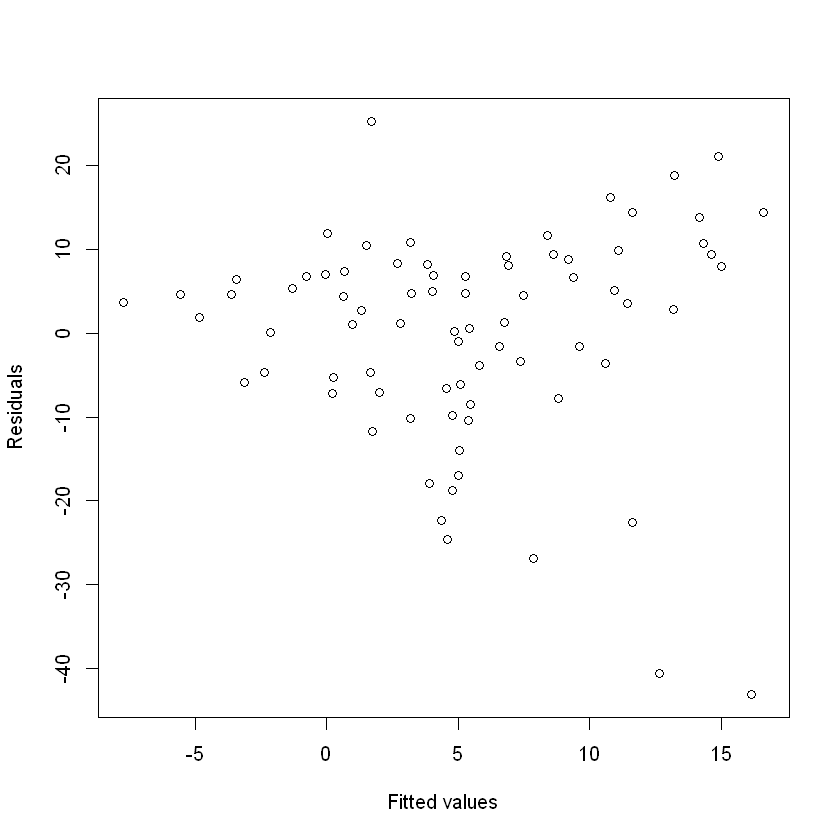

In [128]:
predict(paperlm,new,interval=c("confidence"))
predict(paperlm,new,interval=c("prediction"))
plot(fitted(paperlm),residuals(paperlm),xlab="Fitted values",ylab="Residuals")